<a href="https://colab.research.google.com/github/acate/face_detection/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Librairies

In [2]:
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import imutils
import os
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 33.7 MB/s eta 0:00:00


## Define function for using webcam

In [37]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Get a face image

## Method 1: Take photo using webcam

In [38]:
image_file = take_photo()

cvReadFlag = True



<IPython.core.display.Javascript object>

## Method 2: Upload an image file

In [54]:

image = files.upload()
cvReadFlag = False

file_path = os.path.join('/content/',list(image.keys())[0])
image = cv2.imread(file_path)

IndexError: list index out of range

# Run this code after doing Method 1 or 2

400 306


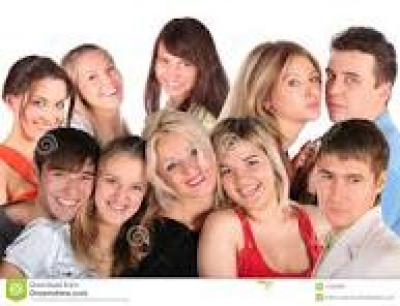

In [50]:


if cvReadFlag:
  #image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
  image = cv2.imread(image_file)


# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

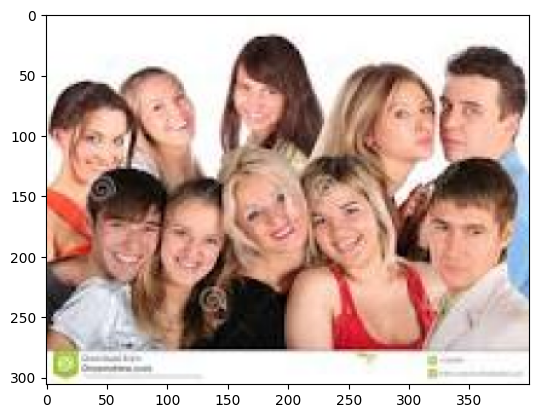

In [51]:
#@title Display image

im = np.array(image)

# Convert the image from BGR to RGB color space
rgb_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = PIL.Image.fromarray(rgb_image)
image = im
boundary = 24
# height = (im.size[1] / im.size[0]) * 20
# fig=plt.subplots(figsize=(20,height)) # orig. line
fig=plt.subplots()
imshow(im)

Number of faces: 5
Time taken: 0.11  seconds


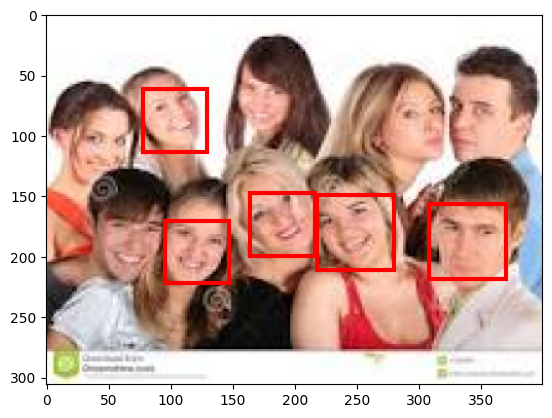

In [52]:
#@title Use 'Face Recognition' library and draw a red box around the faces
image_array = np.array(image)
start = time.time()
face_locations = face_recognition.face_locations(image_array)
fig,ax = plt.subplots()
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Number of faces: 5
Time taken: 0.23596715927124023  seconds


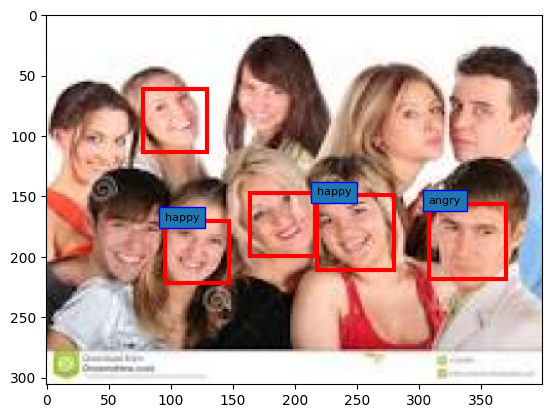

In [53]:
#@title Use 'Face Recognition' library and draw a red box around the faces as well as predicted emotion
start = time.time()
face_locations = face_recognition.face_locations(image_array)
fig,ax = plt.subplots()
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image_array[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")